# Time Methods

## Python Datetime Review

Basic Python outside of Pandas contains a datetime library:

In [1]:
import numpy as np
import pandas as pd


In [2]:
import copy

In [3]:
from datetime import datetime

In [4]:
# To illustrate the order of arguments
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [5]:
# January 2nd, 2017
my_date = datetime(my_year,my_month,my_day)
my_date2 = copy.copy(my_date)

In [6]:
my_date2 = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

In [7]:
my_date2

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [8]:
# Defaults to 0:00
my_date 

datetime.datetime(2017, 1, 2, 0, 0)

In [9]:
# January 2nd, 2017 at 13:30:15
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

In [10]:
my_date_time

datetime.datetime(2017, 1, 2, 13, 30, 15)

You can grab any part of the datetime object you want

In [11]:
my_date.day

2

In [12]:
my_date2.second

15

In [13]:
my_date_time.hour

13

# Pandas

# Converting to datetime

Often when data sets are stored, the time component may be a string. Pandas easily converts strings to datetime objects.

In [14]:
import pandas as pd

In [15]:
myseries = pd.Series(['Nov 3, 2000', '01-01-2000', None])

In [16]:
myseries

0    Nov 3, 2000
1     01-01-2000
2           None
dtype: object

In [17]:
myseries[0]

'Nov 3, 2000'

### pd.to_datetime()

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#converting-to-timestamps

In [18]:
pd.to_datetime(myseries[1])

Timestamp('2000-01-01 00:00:00')

In [19]:
pd.to_datetime(myseries[0])

Timestamp('2000-11-03 00:00:00')

In [20]:
euro_date = '31-12-2000'

In [21]:
pd.to_datetime(euro_date) 

C:\Users\Enzo\AppData\Local\Temp\ipykernel_3628\2851784268.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(euro_date)


Timestamp('2000-12-31 00:00:00')

In [22]:
# 10th of Dec OR 12th of October?
# We may need to tell pandas
euro_date1 = '10-12-2000'

In [23]:
pd.to_datetime(euro_date1) 

Timestamp('2000-10-12 00:00:00')

In [24]:
pd.to_datetime(euro_date1,dayfirst=False) 

Timestamp('2000-10-12 00:00:00')

In [25]:
pd.to_datetime(euro_date1,yearfirst=False) 

Timestamp('2000-10-12 00:00:00')

In [26]:
pd.to_datetime(euro_date1,dayfirst=True,yearfirst=True) 

Timestamp('2000-12-10 00:00:00')

In [27]:
pd.to_datetime(euro_date1,dayfirst=True) 

Timestamp('2000-12-10 00:00:00')

## Custom Time String Formatting

Sometimes dates can have a non standard format, luckily you can always specify to pandas the format. You should also note this could speed up the conversion, so it may be worth doing even if pandas can parse on its own.

A full table of codes can be found here: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [28]:
style_date = '12--Dec--2000'

In [29]:
pd.to_datetime(style_date, format='%d--%b--%Y')

Timestamp('2000-12-12 00:00:00')

In [30]:
strange_date = '12th of Dec 2040'

In [31]:
pd.to_datetime(strange_date)

Timestamp('2040-12-12 00:00:00')

## Data

Retail Sales: Beer, Wine, and Liquor Stores

Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly


U.S. Census Bureau, Retail Sales: Beer, Wine, and Liquor Stores [MRTSSM4453USN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MRTSSM4453USN, July 2, 2020.

In [32]:
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv')

In [33]:
sales.head(5)

,DATE,MRTSSM4453USN
0,1992-01-01,1509.0
1,1992-02-01,1541.0
2,1992-03-01,1597.0
3,1992-04-01,1675.0
4,1992-05-01,1822.0


In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           391 non-null    object 
 1   MRTSSM4453USN  391 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


In [35]:
sales.loc[5][0]

C:\Users\Enzo\AppData\Local\Temp\ipykernel_3628\474702941.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales.loc[5][0]


'1992-06-01'

In [36]:
sales.iloc[0]['DATE']

'1992-01-01'

In [37]:
type(sales.iloc[0]['DATE'])

str

In [38]:
sales['DATE'] = pd.to_datetime(sales['DATE'])

In [39]:
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509.0
1,1992-02-01,1541.0
2,1992-03-01,1597.0
3,1992-04-01,1675.0
4,1992-05-01,1822.0
...,...,...
386,2024-03-01,5876.0
387,2024-04-01,5646.0
388,2024-05-01,6385.0
389,2024-06-01,6273.0


In [40]:
sales.iloc[0]['DATE']

Timestamp('1992-01-01 00:00:00')

In [41]:
type(sales.iloc[0]['DATE'])

pandas._libs.tslibs.timestamps.Timestamp

------

## Attempt to Parse Dates Automatically

**parse_dates** - bool or list of int or names or list of lists or dict, default False
The behavior is as follows:

    boolean. If True -> try parsing the index.

    list of int or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3 each as a separate date column.

    list of lists. e.g. If [[1, 3]] -> combine columns 1 and 3 and parse as a single date column.

    dict, e.g. {‘foo’ : [1, 3]} -> parse columns 1, 3 as date and call result ‘foo’

    If a column or index cannot be represented as an array of datetimes, say because of an unparseable value or a mixture of timezones, the column or index will be returned unaltered as an object data type. For non-standard datetime parsing, use pd.to_datetime after pd.read_csv. To parse an index or column with a mixture of timezones, specify date_parser to be a partially-applied pandas.to_datetime() with utc=True. See Parsing a CSV with mixed timezones for more.

In [42]:
# Parse Column at Index 0 as Datetime
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv',parse_dates=[0])

In [43]:
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509.0
1,1992-02-01,1541.0
2,1992-03-01,1597.0
3,1992-04-01,1675.0
4,1992-05-01,1822.0
...,...,...
386,2024-03-01,5876.0
387,2024-04-01,5646.0
388,2024-05-01,6385.0
389,2024-06-01,6273.0


In [44]:
type(sales.iloc[0]['DATE'])

pandas._libs.tslibs.timestamps.Timestamp

## Resample


A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method. [[reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)]

In [45]:
# Our index
sales.index

RangeIndex(start=0, stop=391, step=1)

In [46]:
# Reset DATE to index

In [47]:
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv',parse_dates=[0])

In [48]:
sales = sales.set_index('DATE')

In [49]:
sales

,MRTSSM4453USN
DATE,
1992-01-01,1509.0
1992-02-01,1541.0
1992-03-01,1597.0
1992-04-01,1675.0
1992-05-01,1822.0
...,...
2024-03-01,5876.0
2024-04-01,5646.0
2024-05-01,6385.0


When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [50]:
# Yearly Means
sales.head(20)

,MRTSSM4453USN
DATE,
1992-01-01,1509.0
1992-02-01,1541.0
1992-03-01,1597.0
1992-04-01,1675.0
1992-05-01,1822.0
1992-06-01,1775.0
1992-07-01,1912.0
1992-08-01,1862.0
1992-09-01,1770.0


In [51]:
# Yearly Means
sales.resample(rule='A').mean()

C:\Users\Enzo\AppData\Local\Temp\ipykernel_3628\617153722.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  sales.resample(rule='A').mean()


,MRTSSM4453USN
DATE,
1992-12-31,1807.250000
1993-12-31,1794.833333
1994-12-31,1841.750000
1995-12-31,1833.916667
1996-12-31,1929.750000
1997-12-31,2006.750000
1998-12-31,2115.166667
1999-12-31,2206.333333
2000-12-31,2375.583333


In [52]:
import seaborn as sns

C:\Users\Enzo\AppData\Local\Temp\ipykernel_3628\4268337731.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  sns.lineplot(sales.resample(rule='A').mean())


<Axes: xlabel='DATE'>

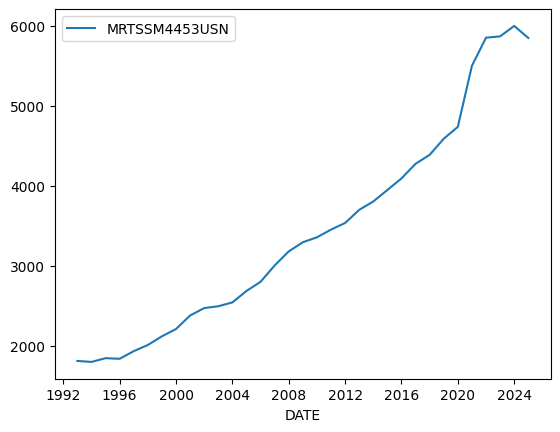

In [53]:
sns.lineplot(sales.resample(rule='A').mean())

Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function (in this case we calculate the mean), and reports the result as the last day of that year. Note 2020 in this data set was not complete.

# .dt Method Calls

Once a column or index is ina  datetime format, you can call a variety of methods off of the .dt library inside pandas:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

In [54]:
sales = sales.reset_index()

In [55]:
sales

,DATE,MRTSSM4453USN
0,1992-01-01,1509.0
1,1992-02-01,1541.0
2,1992-03-01,1597.0
3,1992-04-01,1675.0
4,1992-05-01,1822.0
...,...,...
386,2024-03-01,5876.0
387,2024-04-01,5646.0
388,2024-05-01,6385.0
389,2024-06-01,6273.0


In [56]:
help(sales['DATE'].dt)

Help on DatetimeProperties in module pandas.core.indexes.accessors object:

class DatetimeProperties(Properties)
 |  DatetimeProperties(data: 'Series', orig) -> 'None'
 |
 |  Accessor object for datetimelike properties of the Series values.
 |
 |  Examples
 |  --------
 |  >>> seconds_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="s"))
 |  >>> seconds_series
 |  0   2000-01-01 00:00:00
 |  1   2000-01-01 00:00:01
 |  2   2000-01-01 00:00:02
 |  dtype: datetime64[ns]
 |  >>> seconds_series.dt.second
 |  0    0
 |  1    1
 |  2    2
 |  dtype: int32
 |
 |  >>> hours_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="h"))
 |  >>> hours_series
 |  0   2000-01-01 00:00:00
 |  1   2000-01-01 01:00:00
 |  2   2000-01-01 02:00:00
 |  dtype: datetime64[ns]
 |  >>> hours_series.dt.hour
 |  0    0
 |  1    1
 |  2    2
 |  dtype: int32
 |
 |  >>> quarters_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="QE"))
 |  >>> quarters_series
 |  0   2000-03-31


In [57]:
sales['DATE'].dt.month

0      1
1      2
2      3
3      4
4      5
      ..
386    3
387    4
388    5
389    6
390    7
Name: DATE, Length: 391, dtype: int32

In [58]:
sales['DATE'].dt.is_leap_year

0      True
1      True
2      True
3      True
4      True
       ... 
386    True
387    True
388    True
389    True
390    True
Name: DATE, Length: 391, dtype: bool